## Imports

In [2]:
import json
import pandas as pd

import pyspark
import random

sc = pyspark.SparkContext(appName="Pi")


In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

# df = spark.read.csv("/home/stp/test1.csv",header=True,sep="|");
spark



## Load Data

In [30]:
review_df=spark.read.json('F:/Download/yelp_academic_dataset/yelp_academic_dataset_review.json')

In [31]:
review_df.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|   0|2015-12-05 03:18:11|    0|LG2ZaYiOgpr2DK_90...|  5.0|I love Deagan's. ...|     1|V34qejxNsCbcgD8C0...|
|5JxlZaqCnk1MnbgRi...|   0|2011-05-27 05:30:52|    0|i6g_oA9Yf9Y31qt0w...|  1.0|Dismal, lukewarm,...|     0|ofKDkJKXSKZXu5xJN...|
|IS4cv902ykd8wj1TR...|   0|2017-01-14 21:56:57|    0|6TdNDKywdbjoTkize...|  4.0|Oh happy d

In [129]:
business_df=spark.read.json('F:/Download/yelp_academic_dataset/yelp_academic_dataset_business.json').na.drop()

In [130]:
business_df.show()

+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|           city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|     10913 Bailey Rd|[,,,,,,, True,, T...|f9NumwFMBDn751xgF...|Active Life, Gun/...|      Cornelius|[11:0-20:0, 10:0-...|      1|   35.4627242|   -80.8526119|The Range At Lake...|      28031|          36|  3.5|   NC|
|      1015 Sharp Cir|[,,,,,,, True,, T...|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|North Las Vegas|[7:0-16:0, 7:0-16...|      

## Clean Data

In [131]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [48]:
review_df.createOrReplaceTempView("review_df")

review_sqlDF = spark.sql("SELECT business_id, user_id, text, review_id FROM review_df")
review_sqlDF.show()

+--------------------+--------------------+--------------------+--------------------+
|         business_id|             user_id|                text|           review_id|
+--------------------+--------------------+--------------------+--------------------+
|-MhfebM0QIsKt87iD...|OwjRMXRC0KyPrIlcj...|As someone who ha...|xQY8N_XvtGbearJ5X...|
|lbrU8StCq3yDfr-QM...|nIJD_7ZXHq-FX8byP...|I am actually hor...|UmFMZ8PyXZTY2Qcwz...|
|HQl28KMwrEKHqhFrr...|V34qejxNsCbcgD8C0...|I love Deagan's. ...|LG2ZaYiOgpr2DK_90...|
|5JxlZaqCnk1MnbgRi...|ofKDkJKXSKZXu5xJN...|Dismal, lukewarm,...|i6g_oA9Yf9Y31qt0w...|
|IS4cv902ykd8wj1TR...|UgMW8bLE0QMJDCkQ1...|Oh happy day, fin...|6TdNDKywdbjoTkize...|
|nlxHRv1zXGT0c0K51...|5vD2kmE25YBrbayKh...|This is definitel...|L2O_INwlrRuoX05KS...|
|Pthe4qk5xh4n-ef-9...|aq_ZxGHiri48TUXJl...|Really good place...|ZayJ1zWyWgY9S_TRL...|
|FNCJpSn0tL9iqoY3J...|dsd-KNYKMpx6ma_sR...|Awesome office an...|lpFIJYpsvDxyph-kP...|
|e_BiI4ej1CW1F0EyV...|P6apihD4ASf1vpPxH...|Most delici

In [62]:
business_df.createOrReplaceTempView("business_df")

business_sqlDF = spark.sql("SELECT business_id, categories, hours, name, postal_code, review_count, stars FROM business_df")
business_sqlDF.show()

+--------------------+--------------------+--------------------+--------------------+-----------+------------+-----+
|         business_id|          categories|               hours|                name|postal_code|review_count|stars|
+--------------------+--------------------+--------------------+--------------------+-----------+------------+-----+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|[11:0-20:0, 10:0-...|The Range At Lake...|      28031|          36|  3.5|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|                null|   Carlos Santo, NMD|      85258|           4|  5.0|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|                null|             Felinus|    H4C 1P4|           5|  5.0|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|[7:0-16:0, 7:0-16...|Nevada House of Hose|      89030|           3|  2.5|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|[9:0-16:0, 0:0-0:...|USE MY GUY SERVIC...|      85205|          26|  4.5|
|cKyLV5oWZJ2NudWgq...|Auto Repair, Auto...|[7:0-18:0, 7:0-18...|

In [307]:
analysis_1=spark.sql("SELECT b.business_id, categories, name, postal_code,city, review_count, r.stars, text, is_open, review_id, useful \
                      FROM business_df b JOIN review_df r ON b.business_id = r.business_id \
                      WHERE categories like '%Coffee%'").na.drop()
analysis_1.createOrReplaceTempView("analysis_1")

In [308]:
analysis_df.show()

+--------------------+--------------------+-----------------+-----------+-------------+------------+-----+--------------------+-------+--------------------+------+---------+---------+---------+---------+---------+---------+---------+
|         business_id|          categories|             name|postal_code|         city|review_count|stars|                text|is_open|           review_id|useful|   Friday|   Monday| Saturday|   Sunday| Thursday|  Tuesday|Wednesday|
+--------------------+--------------------+-----------------+-----------+-------------+------------+-----+--------------------+-------+--------------------+------+---------+---------+---------+---------+---------+---------+---------+
|-TGwtTiieh_JLml5_...|  Food, Coffee & Tea|        Starbucks|    L4C 3C7|Richmond Hill|           8|  3.0|Always busy here....|      0|u62FfEwT0YgKxRyN8...|     2|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|
|-TGwtTiieh_JLml5_...|  Food, Coffee & Tea|        Starbucks|   

In [273]:
analysis_hours=spark.sql("SELECT business_id, hours FROM business_df").na.drop()
analysis_hours.createOrReplaceTempView("analysis_hours")
analysis_hours.show()

+--------------------+--------------------+
|         business_id|               hours|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|[11:0-20:0, 10:0-...|
|6OAZjbxqM5ol29BuH...|[7:0-16:0, 7:0-16...|
|51M2Kk903DFYI6gnB...|[9:0-16:0, 0:0-0:...|
|cKyLV5oWZJ2NudWgq...|[7:0-18:0, 7:0-18...|
|oiAlXZPIFm2nBCt0D...|[7:0-19:0, 7:0-19...|
|ScYkbYNkDgCneBrD9...|[7:30-17:0, 7:30-...|
|pQeaRpvuhoEqudo3u...|[11:30-14:30, 11:...|
|EosRKXIGeSWFYWwpk...|[5:30-23:0, 5:30-...|
|MbZMmwo-eL0Jnm_Yb...|[7:0-17:0, 7:0-17...|
|7Dv4_HAxsxvadEsT5...|[8:0-17:0, 8:0-17...|
|M_guz7Dj7hX0evS67...|[11:0-22:0, 0:0-0...|
|JjJs3o60uQCfctDjs...|[9:0-16:0, 9:0-16...|
|kOICO53wbOiOJcKuC...|[8:0-21:0, 8:0-21...|
|rqcOZePlVvJP9Etzl...|[8:0-18:0, 8:0-18...|
|edQoeeBFUTYGwnUSE...|[8:0-18:0, 8:0-18...|
|Vwo64kNYDjKi98gUU...|[5:30-20:0, 5:30-...|
|x3Po6tJGb729u_HJP...|[18:0-22:0,, 18:0...|
|mKTq1T_IAplDpHUcM...|[9:0-2:30, 0:0-0:...|
|eBEfgOPG7pvFhb2wc...|[11:0-22:0, 11:0-...|
|1wWneWD_E1pBIyVpd...|[10:0-21:0

In [277]:
analysis_hours_split= analysis_hours.select('business_id',"hours.*").na.drop()
analysis_hours_split.createOrReplaceTempView("analysis_hours_split")


In [278]:
analysis_hours_split.show()

+--------------------+---------+---------+---------+---------+---------+---------+---------+
|         business_id|   Friday|   Monday| Saturday|   Sunday| Thursday|  Tuesday|Wednesday|
+--------------------+---------+---------+---------+---------+---------+---------+---------+
|f9NumwFMBDn751xgF...|11:0-20:0|10:0-18:0|11:0-20:0|13:0-18:0|11:0-20:0|11:0-20:0|10:0-18:0|
|EosRKXIGeSWFYWwpk...|5:30-23:0|5:30-23:0| 8:0-19:0| 8:0-17:0|5:30-23:0|5:30-23:0|5:30-23:0|
|M_guz7Dj7hX0evS67...|11:0-22:0|  0:0-0:0|11:0-22:0|11:0-21:0|11:0-21:0|11:0-21:0|11:0-21:0|
|kOICO53wbOiOJcKuC...| 8:0-21:0| 8:0-21:0| 9:0-19:0| 9:0-19:0| 8:0-21:0| 8:0-21:0| 8:0-21:0|
|rqcOZePlVvJP9Etzl...| 8:0-18:0| 8:0-18:0| 8:0-18:0| 9:0-15:0| 8:0-18:0| 8:0-18:0| 8:0-18:0|
|mKTq1T_IAplDpHUcM...| 9:0-2:30|  0:0-0:0| 9:0-2:30| 12:0-0:0|  9:0-0:0|  9:0-0:0|  9:0-0:0|
|eBEfgOPG7pvFhb2wc...|11:0-22:0|11:0-22:0|11:0-22:0|11:0-21:0|11:0-22:0|11:0-22:0|11:0-22:0|
|1wWneWD_E1pBIyVpd...|10:0-21:0|10:0-21:0|9:30-21:0|11:0-19:0|10:0-21:

In [317]:
analysis_df=spark.sql("SELECT a.business_id,categories, name, postal_code,city, review_count, stars, text, is_open, review_id, useful,Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday \
                       FROM analysis_1 b JOIN analysis_hours_split a ON b.business_id = a.business_id")

analysis_df.cache().createOrReplaceTempView("analysis_df")

In [318]:
analysis_df.show()

+--------------------+--------------------+----------+-----------+-------------+------------+-----+--------------------+-------+--------------------+------+---------+---------+---------+---------+---------+---------+---------+
|         business_id|          categories|      name|postal_code|         city|review_count|stars|                text|is_open|           review_id|useful|   Friday|   Monday| Saturday|   Sunday| Thursday|  Tuesday|Wednesday|
+--------------------+--------------------+----------+-----------+-------------+------------+-----+--------------------+-------+--------------------+------+---------+---------+---------+---------+---------+---------+---------+
|-TGwtTiieh_JLml5_...|  Food, Coffee & Tea| Starbucks|    L4C 3C7|Richmond Hill|           8|  3.0|Always busy here....|      0|u62FfEwT0YgKxRyN8...|     2|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|6:0-21:30|
|-TGwtTiieh_JLml5_...|  Food, Coffee & Tea| Starbucks|    L4C 3C7|Richmond Hill|           8

## Analystics

In [ ]:
# order the review counts for each shop, get the most popular one

In [488]:
df_review_counts=spark.sql("SELECT name, sum(review_count) as review_counts,city, postal_code, AVG(stars) as star \
                            FROM analysis_df GROUP BY postal_code, name, city \
                            ORDER BY sum(review_count) DESC")

df_review_counts.createOrReplaceTempView("df_review_counts")

In [670]:
df_review_counts.show()

+--------------------+-------------+----------+-----------+------------------+
|                name|review_counts|      city|postal_code|              star|
+--------------------+-------------+----------+-----------+------------------+
|Snooze, An A.M. E...|     12682120|   Phoenix|      85016| 4.151330376940133|
|         Lux Central|      5047640|   Phoenix|      85012| 4.226795096322242|
|Amélie's French B...|      3348416| Charlotte|      28205| 4.100431965442764|
|Butters Pancakes ...|      2983750|Scottsdale|      85258| 4.441714285714285|
|           The Henry|      2295748|   Phoenix|      85018| 4.063994828700711|
|      Liberty Market|      2167793|   Gilbert|      85234| 4.235992089650626|
|         Kung Fu Tea|      2015244| Las Vegas|      89146| 4.333562585969739|
|        Omelet House|      1938784| Las Vegas|      89102|4.4237047551454936|
|     BabyStacks Cafe|      1864128| Las Vegas|      89128| 4.146359048305696|
|Breakfast Club- S...|      1767108|Scottsdale|     

In [780]:
pd.set_option('display.max_colwidth', -1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [781]:
snooze_analysis=spark.sql("SELECT name, city, postal_code, AVG(stars) as star, Friday, Monday,  Saturday, Sunday, Thursday, Tuesday, Wednesday  \
                           FROM analysis_df \
                           WHERE name like 'Snooze%'\
                           GROUP BY name, city, Friday, Monday,  Saturday, Sunday, Thursday, Tuesday, Wednesday, postal_code ")
snooze_analysis.createOrReplaceTempView("snooze_analysis")
snooze_analysis.toPandas()

,name,city,postal_code,star,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,"Snooze, An A.M. Eatery",Tempe,85281,4.356661,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30
1,"Snooze, An A.M. Eatery",Phoenix,85016,4.151330,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30
2,"Snooze, an A.M. Eatery",Scottsdale,85254,4.317317,6:30-15:0,0:0-0:0,6:30-15:0,6:30-15:0,6:30-15:0,6:30-15:0,6:30-15:0
3,"Snooze, An A.M. Eatery",Phoenix,85044,4.078431,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30
4,Snooze an A.M. Eatery,Gilbert,85234,3.887339,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30,6:30-14:30


In [ ]:
#analyse the key words in Snooze's reviews

In [721]:
topshop_analysis=spark.sql("SELECT text FROM analysis_df WHERE name like 'Snooze%'")
topshop_analysis.createOrReplaceTempView("topshop_analysis")

In [742]:
topshop_analysis=spark.sql("SELECT replace(replace(replace(replace(replace(replace(lower(text), ' a ', ''), 'the ', ''), ' an ', ''), 'it ', ''),' was ', ''), ' not ', '') as text FROM analysis_df WHERE name like 'Snooze%'")

In [743]:
topshop_analysis=topshop_analysis.toPandas()


In [782]:
topshop_analysis

,text
0,"i always take pictures of my food but at snooze i straight up didn't have time first time becauseso freaking delicious. i have since been at leastfew times and have some more to say \n\ni haven't seen anyone talking about their shrimp and grits but it's really good! perfectly spicy. i'm saying that as someone from nola! \n\nhot chocolate is also delicious! strong recommend! \n\nsweet potato pancake ismust! we have ordered itla carte andworth almost $5. i couldn't have 3 myself just because i can't handle that must sticky, thick sweet. pancake itself has perfect amount of sweet though. sometimes we get in flight if we are really feeling ambitious. goes well with pineapple upside down! \n\ni will say their hash browns really aren't something to call home about. it's only part of meal i felt we could've done without. \n\nservicegood, prompt, kind. seated outside which can sometimes be hazardous (they have bee problems like everywhere else in tempe). it'sgood place to take someone to brunch if you want to seem hip."
1,stopped in for brunch today. can't complain about food. all our dishes were delicious! servicedeserving of2 star so food really helped you on this review. i understand it's 102 outside and outside tables probably aren't ones you want to check up on. but geez. drinks forgotten... coffee forgotten... get charged wrong on bill then confronts me like i'm wrong but then offers to remove whole charge?? i didn't want removed ifine paying what said i would be charged on menu. i didn't even have her waste her time rebilling me. we just left. bloody mary's were gross too. casinos makebetter bloody mary than this spot.
2,"best gluten free pancake i've ever had!\n\noh my goodness, large crowd and long watime didn't matter. their sweet potato pancakeso amazingly fluffy and flavorful. kate, my server,super friendly and brought everything on time.\n\nwasgreat experience, i'll be back!"
3,freaking 5s across board!!!! omg! food exceptional! service awesome! our serverspencer and she couldn't have been more attentive! shesuchdoll! mimosaphenomenal! i had benny duo with salmon and beef chili verde! i'm soooo full butnice full! i'm so glad we came here! wasgreat start forsunday!!! ask for spencer!
4,pancake flightvery good! my favoriteupside down cake. chicken sausage and hash browns were good too. i hadpanimoses which is basicallygrapefruversion of mimosas it'srefreshing. mojitogood too! great customer service. whole family loved place.
...,...
7077,was really delicious breakfast this morning. peanut butter pancakereally awesome. robert gave eggseptional service!
7078,our server lilaawesome and gavegreat recommendation for spuds breakfast. i'll definitely be back and hope to have her as our server again
7079,"not sure about food because we walked out. musicso loud inside that we couldn't hear each other talk. we came to eat and enjoy each other's company,dance inclub! managereitherpresent or wants to bedj. maybeset of earpods for person in charge of music so rest of restaurant can have conversation while eating!"
7080,"only way to start your day is by having bangkok bloody mary with breakfast at snooze! probably best tasting bloody mary i've had. breakfast is always great, and service impeccable. jordan is best server i ever had. her engaging attitude made eating here fun!"


In [754]:
stopwords = [
'i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
'her',
'hers',
'herself',
'it',
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'being',
'have',
'has',
'had',
'having',
'do',
'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'down',
'in',
'out',
'on',
'off',
'over',
'under',
'again',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'all',
'any',
'both',
'each',
'few',
'more',
'most',
'other',
'some',
'such',
'no',
'nor',
'not',
'only',
'own',
'same',
'so',
'than',
'too',
'very',
's',
't',
'can',
'will',
'just',
'don',
'should',
'now',
'!',
'get',
'one',
'go',
'got',
"it's"
]

sw_df=pd.DataFrame(stopwords, columns=['stopwords'])

In [760]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [755]:
from collections import Counter

no_sw = topshop_analysis['text'].apply(lambda word: [word for word in word.split(' ') if word not in stopwords] )
corpus=[]
for ea in no_sw:
    corpus+=ea
wordDict=Counter(corpus)
[(k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse = True )][:20]

[('', 7462),
 ('breakfast', 3137),
 ('food', 3035),
 ('place', 2333),
 ('great', 1889),
 ('snooze', 1853),
 ('time', 1726),
 ('good', 1656),
 ('pancakes', 1638),
 ('pancake', 1549),
 ('would', 1541),
 ('eggs', 1409),
 ('like', 1395),
 ('back', 1336),
 ('love', 1293),
 ('service', 1281),
 ('came', 1193),
 ('try', 1163),
 ('ordered', 1150),
 ('us', 1148)]

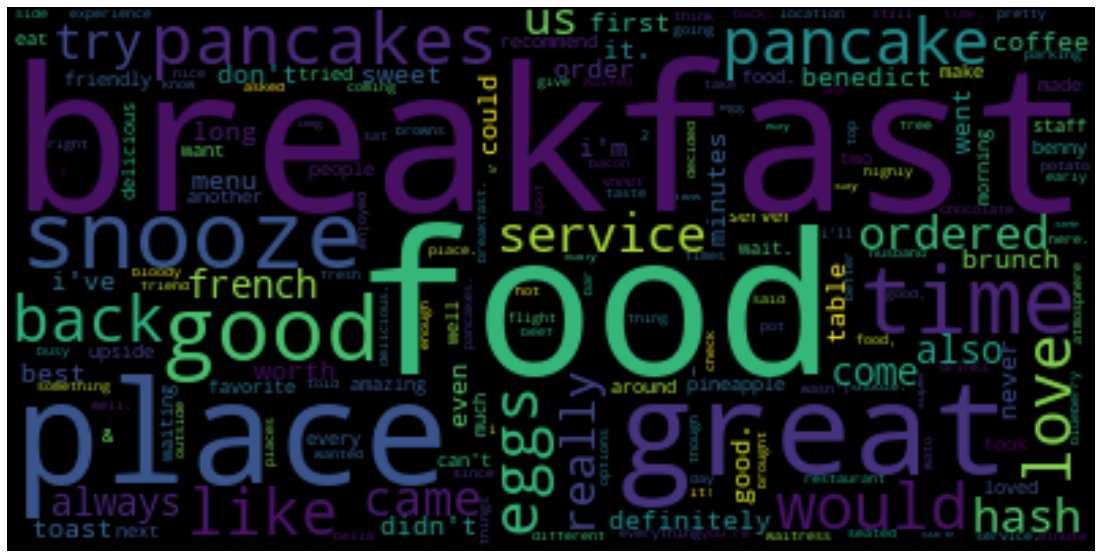

In [765]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(wordDict)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# histogram table to show the star rating distribution

In [503]:
pd_review_counts=df_review_counts.toPandas()

In [529]:
hist_review_counts=pd_review_counts['star']

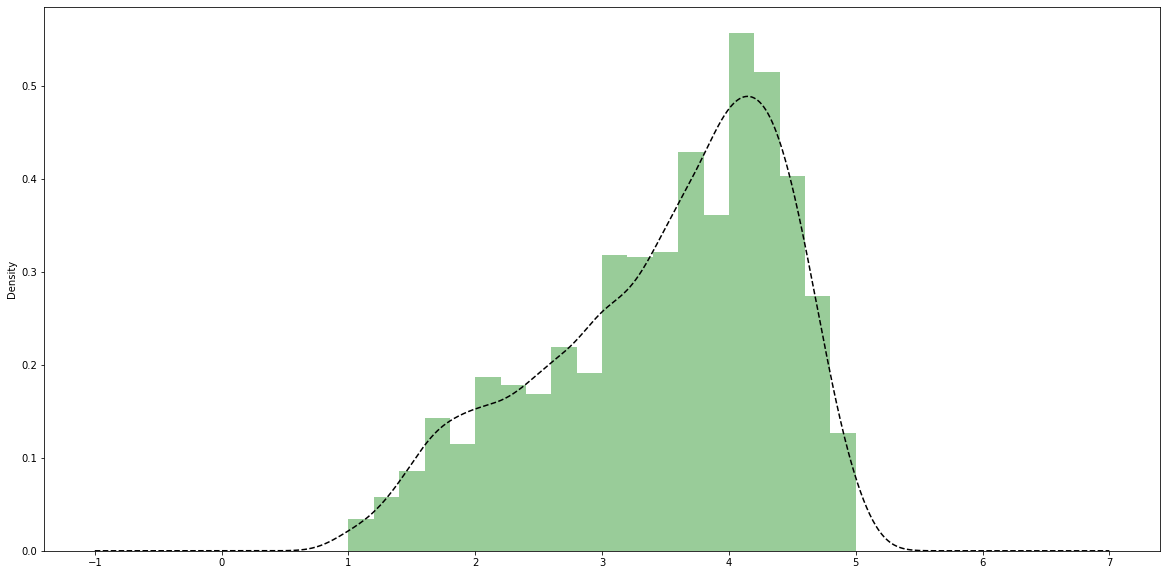

In [666]:
hist_review_counts.hist(bins = 20,
       histtype = 'bar',
       align = 'mid',
       orientation = 'vertical',
       color = 'g',
       alpha=0.4,
       normed =True,

         )
hist_review_counts.plot(kind='kde', style='k--')

In [ ]:
# Find out the top coffee shops areas

In [353]:
plt_review_counts=pd_review_counts[['city', 'review_counts']].head(30)
plt_review_counts

,city,review_counts
0,Phoenix,12682120
1,Phoenix,5047640
2,Charlotte,3348416
3,Scottsdale,2983750
4,Phoenix,2295748
5,Gilbert,2167793
6,Las Vegas,2015244
7,Las Vegas,1938784
8,Las Vegas,1864128
9,Scottsdale,1767108


In [350]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

<Figure size 1600x640 with 0 Axes>

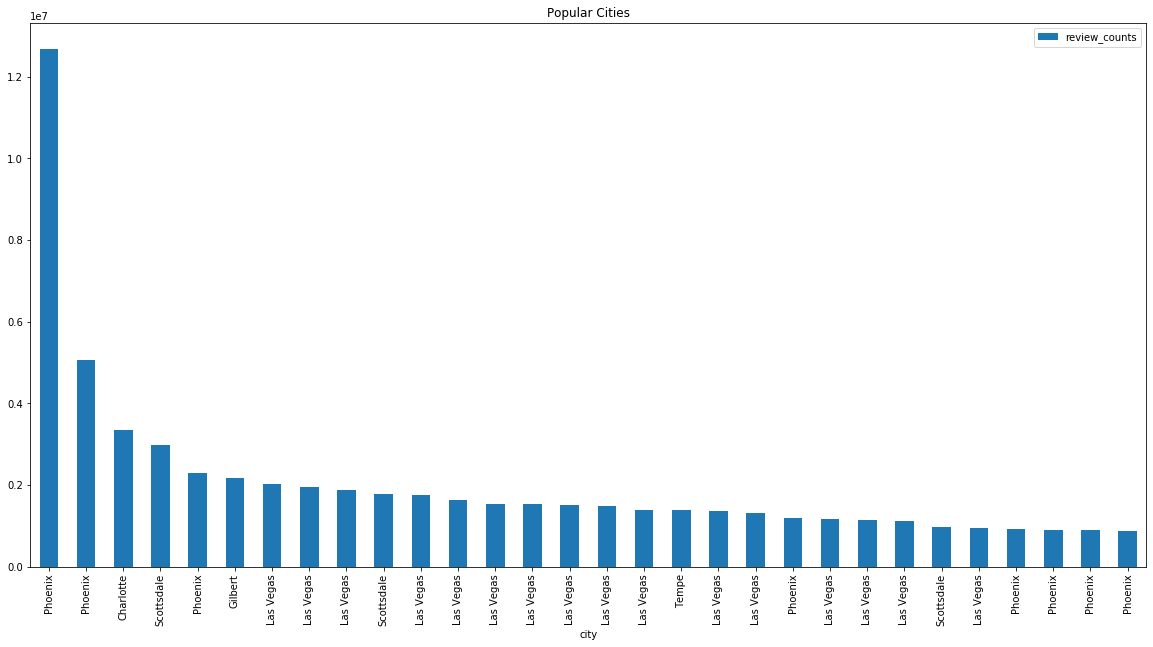

In [661]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.figure(figsize=(20,8), dpi=80)
plt_review_counts.plot.bar(x='city',y = 'review_counts',title='Popular Cities')

In [359]:
df_analysis_city=spark.sql("SELECT * FROM analysis_df WHERE city in('Las Vegas', 'Phoenix', 'Scottsdale')")
df_analysis_city.cache().createOrReplaceTempView("df_analysis_city")

In [360]:
df_analysis_city.show()

+--------------------+--------------------+----------+-----------+----------+------------+-----+--------------------+-------+--------------------+------+-------+-------+--------+-------+--------+-------+---------+
|         business_id|          categories|      name|postal_code|      city|review_count|stars|                text|is_open|           review_id|useful| Friday| Monday|Saturday| Sunday|Thursday|Tuesday|Wednesday|
+--------------------+--------------------+----------+-----------+----------+------------+-----+--------------------+-------+--------------------+------+-------+-------+--------+-------+--------+-------+---------+
|4x8W4quFhhuTZlsoU...|Fast Food, Restau...|McDonald's|      85258|Scottsdale|          49|  2.0|Have to wait abou...|      1|xMGlRtUNMqQNWwGlc...|     0|5:0-1:0|5:0-1:0| 5:0-1:0|5:0-1:0| 5:0-1:0|5:0-1:0|  5:0-1:0|
|4x8W4quFhhuTZlsoU...|Fast Food, Restau...|McDonald's|      85258|Scottsdale|          49|  1.0|I ordered a meal ...|      1|1m56Im_oefWW4UY93..

In [692]:
df_avg_stars=spark.sql("SELECT name, city, AVG(stars) as avg_star, \
                       COUNT(CASE WHEN text like '%delicious%' THEN 1 ELSE NULL END) as taste, \
                       COUNT(CASE WHEN text like '%place%' THEN 1 ELSE NULL END) as environment, \
                       COUNT(CASE WHEN text like '%staff%' THEN 1 ELSE NULL END) as staff,  \
                       COUNT(CASE WHEN text like '%price%' THEN 1 ELSE NULL END) as price  \
                       FROM analysis_df GROUP BY name,city \
                       ORDER BY AVG(stars) DESC \
                       LIMIT 50")

In [693]:
pd_avg_stars=df_avg_stars.toPandas()

In [694]:
pd_avg_stars

,name,city,avg_star,taste,environment,staff,price
0,Deseo Coffee Shack,Phoenix,5.000000,7,8,0,1
1,Ro & Joe's Hot Dog Hut,Phoenix,5.000000,1,1,0,0
2,Icki Sticki,Mount Horeb,5.000000,0,1,0,0
3,Mama Baer's,Gilbert,5.000000,2,2,0,0
4,Cardinal Press,Newmarket,5.000000,1,2,2,0
5,Itea Bubble Tea and Coffee,Calgary,5.000000,1,4,0,0
6,Ming Wah Hong,Montréal,5.000000,1,2,0,3
7,Timothys World Coffee,Etobicoke,5.000000,0,2,0,0
8,Bar à Gaufre,Montréal,5.000000,0,2,0,0
9,Jojos Smokeless World,North Olmsted,5.000000,0,4,1,3


In [415]:
dict_foctors={'taste':pd_avg_stars['taste'].sum(), 'environment': pd_avg_stars['environment'].sum(), 'staff': pd_avg_stars['staff'].sum(), 'price': pd_avg_stars['price'].sum()}
dict_foctors

{'taste': 185, 'environment': 294, 'staff': 69, 'price': 53}

([<matplotlib.axis.XTick at 0x2492a8e2808>,
 <a list of 4 Text xticklabel objects>)

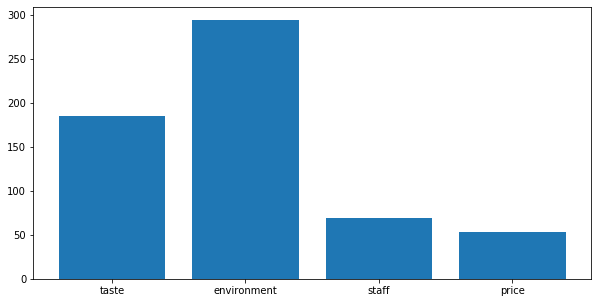

In [421]:
matplotlib.rcParams['figure.figsize'] = (10,5)

plt.bar(range(len(dict_foctors)), list(dict_foctors.values()), align='center')
plt.xticks(range(len(dict_foctors)), list(dict_foctors.keys()))

In [ ]:
# Find out the shutdown coffee shops areas

In [492]:
df_shutdown=spark.sql('SELECT name, city, count(is_open) as shutdown FROM analysis_df WHERE is_open = 0 GROUP BY name, city ORDER BY count(is_open) DESC')
df_shutdown.cache().createOrReplaceTempView("df_shutdown")
df_shutdown.show()

+--------------------+---------------+--------+
|                name|           city|shutdown|
+--------------------+---------------+--------+
|Jean Philippe Pat...|      Las Vegas|    1245|
|         Max Brenner|      Las Vegas|     983|
|Payard Pâtisserie...|      Las Vegas|     640|
|Serenade Coffee B...|      Las Vegas|     590|
|      Duza's Kitchen|        Phoenix|     523|
|   Buddha Belly Deli|      Henderson|     494|
|        Orange Table|     Scottsdale|     472|
|Crepe Shack & Waf...|      Henderson|     453|
|JoBot Coffee & Diner|        Phoenix|     449|
|          Sambalatte|      Las Vegas|     401|
|         Cafe Summer|      Las Vegas|     378|
|Salted Malted Bak...|North Las Vegas|     366|
| Owen's Bagel & Deli|      Charlotte|     362|
|      Holley's Cuppa|      Las Vegas|     351|
|     Jozo Drink Cafe|      Henderson|     346|
|The Beat Coffeeho...|      Las Vegas|     342|
|      French Grocery|        Phoenix|     342|
|       Tea Time Café|      Las Vegas|  

In [495]:
df_shutdown_count=spark.sql('SELECT count(name) as shutdown_count, city FROM df_shutdown GROUP BY city ORDER BY count(name) DESC limit 30')
df_shutdown_count.cache().createOrReplaceTempView("df_shutdown_count")
df_shutdown_count.show()

+--------------+-------------+
|shutdown_count|         city|
+--------------+-------------+
|           225|      Toronto|
|           110|    Las Vegas|
|            71|     Montréal|
|            50|      Phoenix|
|            46|      Calgary|
|            35|   Pittsburgh|
|            35|    Charlotte|
|            29|   Scottsdale|
|            22|      Madison|
|            20|        Tempe|
|            18|    Henderson|
|            16|      Markham|
|            12|Richmond Hill|
|            11|     Chandler|
|            10|      Gilbert|
|             9|    Cleveland|
|             9|     Glendale|
|             9|  Mississauga|
|             8|    Champaign|
|             8|         Mesa|
+--------------+-------------+
only showing top 20 rows



In [496]:
pd_shutdown_count=df_shutdown_count.toPandas()

<Figure size 1600x640 with 0 Axes>

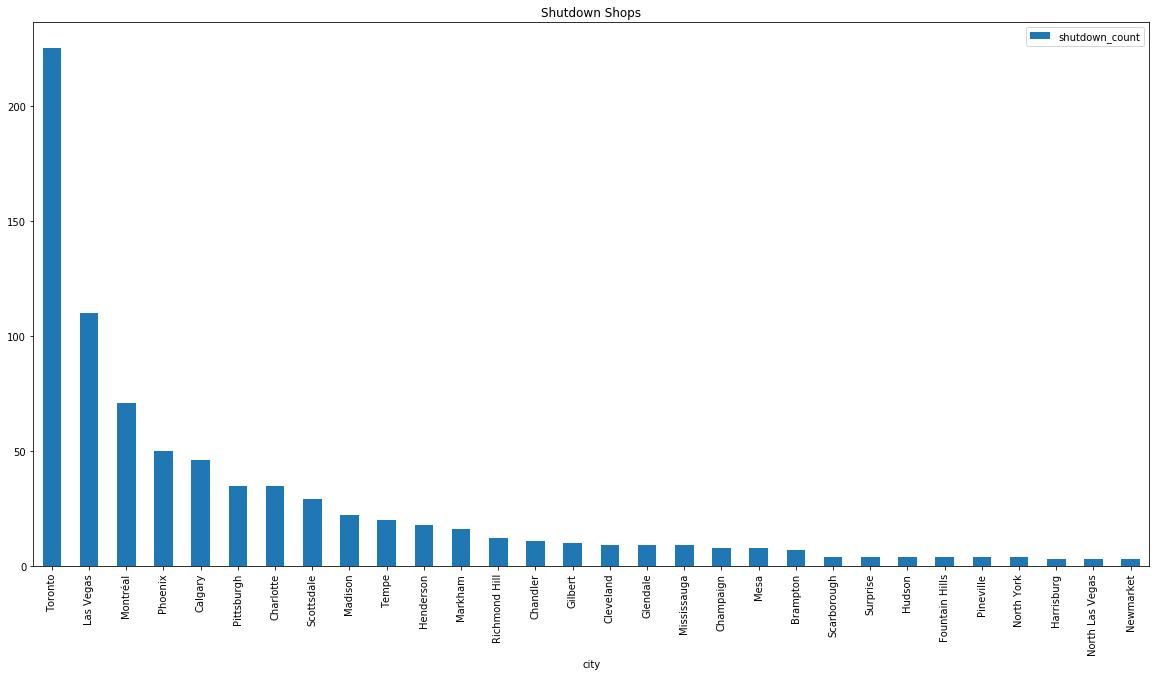

In [663]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.figure(figsize=(20,8), dpi=80)
pd_shutdown_count.plot.bar(x='city',y = 'shutdown_count',title = 'Shutdown Shops')

In [ ]:
# Analyse what factor influences most on customer reviews

In [708]:
star_factor=spark.sql("SELECT stars ,\
                       COUNT(CASE WHEN text like '%coffee%'or text like '%food%' or text like '%delicious%' THEN 1 ELSE NULL END) as taste, \
                       COUNT(CASE WHEN text like '%place%' or text like '%environment%' THEN 1 ELSE NULL END) as environment, \
                       COUNT(CASE WHEN text like '%staff%' or text like '%serve%' THEN 1 ELSE NULL END) as staff,  \
                       COUNT(CASE WHEN text like '%price%' or text like '%cheap%' or text like '%expensive%' THEN 1 ELSE NULL END) as price  \
                       FROM analysis_df \
                       GROUP BY stars \
                       ORDER BY stars DESC \
                       ")

In [709]:
pd_star_factor=star_factor.toPandas()
pd_star_factor

,stars,taste,environment,staff,price
0,5.0,95699,75766,39778,15354
1,4.0,50190,39432,20458,14239
2,3.0,22884,18643,10109,9138
3,2.0,14566,10893,7024,5276
4,1.0,20107,14506,9694,4582


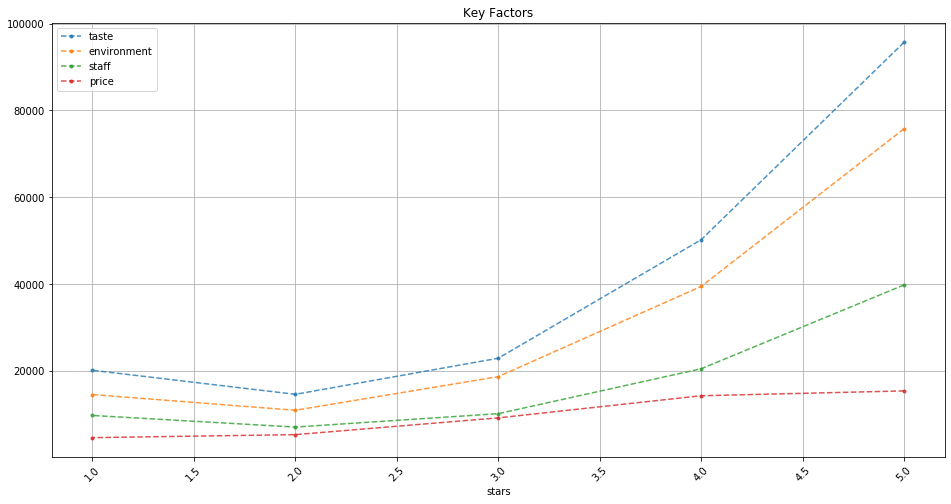

In [710]:
matplotlib.rcParams['figure.figsize'] = (20,10)
pd_star_factor.plot(x='stars',
                    kind='line',
       style = '--.',
       alpha = 0.8,
       use_index = True,
       rot = 45,
       grid = True,
       figsize = (16,8),
       title = 'Key Factors',
       legend = True,
       subplots = False
)